In [1]:
# Import packages needed to perform the analysis
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [10]:
# define the path
path = 'C:\\Users\\labbe\\Google Drive\\Dash\\Projetos\\Super Data Science\\Case Study\\028 - Python\\data\\'

# define the file names
file = path + '1880-2017.csv'

In [11]:
# load the data
df = pd.read_csv(file)

### 1. Perform an exploratory data analysis on the received data:###

a) Print the first and last 10 rows of the data set.

In [12]:
# First 10 rows
df.head(10)

,Month,Value
0,1880-01-01,-0.01
1,1880-02-01,-0.13
2,1880-03-01,-0.14
3,1880-04-01,-0.06
4,1880-05-01,-0.08
5,1880-06-01,-0.18
6,1880-07-01,-0.16
7,1880-08-01,-0.09
8,1880-09-01,-0.10
9,1880-10-01,-0.19


In [13]:
# Last 10 rows
df.tail(10)

,Month,Value
1640,2016-09-01,0.89
1641,2016-10-01,0.74
1642,2016-11-01,0.75
1643,2016-12-01,0.80
1644,2017-01-01,0.90
1645,2017-02-01,0.97
1646,2017-03-01,1.03
1647,2017-04-01,0.90
1648,2017-05-01,0.83
1649,2017-06-01,0.82


b) Investigate the data types.

In [14]:
df.dtypes

Month     object
Value    float64
dtype: object

c) Discover the number of records, mean, standard deviation, quartiles, min and max values.

In [15]:
df.describe()

,Value
count,1650.000000
mean,0.052218
std,0.332780
min,-0.680000
25%,-0.190000
50%,-0.020000
75%,0.260000
max,1.250000


d) Plot the dataset to investigate how the data looks like.

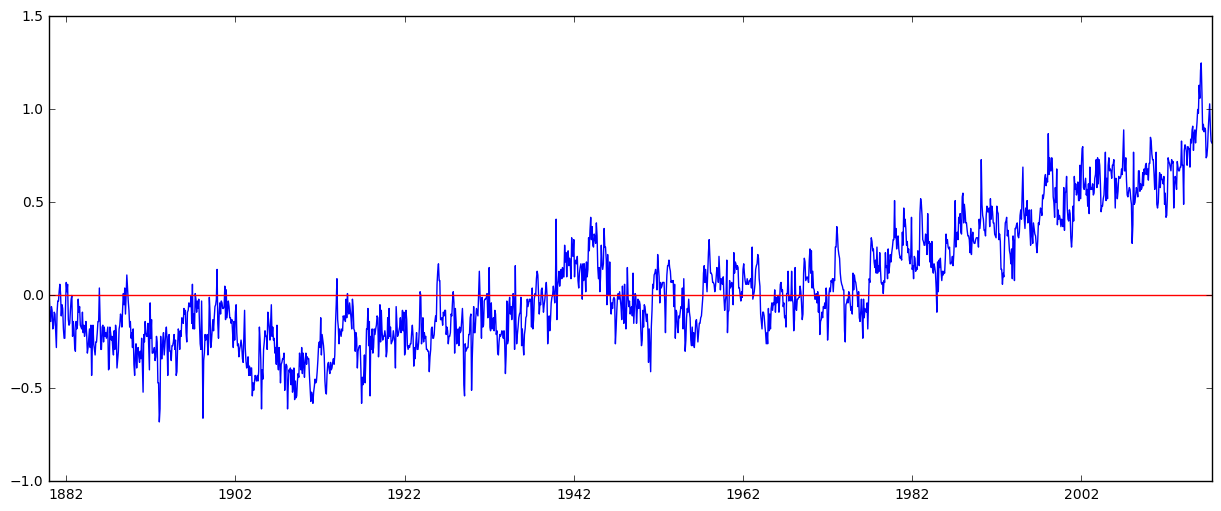

In [16]:
#plt.plot(df.Month, df.Value)
plt.plot(df.Month.values.astype('datetime64[D]'), df.Value)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

e) Plot a histogram to investigate how the data is distributed

(array([  27.,  156.,  439.,  418.,  222.,  160.,  134.,   70.,   19.,    5.]),
 array([-0.68 , -0.487, -0.294, -0.101,  0.092,  0.285,  0.478,  0.671,
         0.864,  1.057,  1.25 ]),
 <a list of 10 Patch objects>)

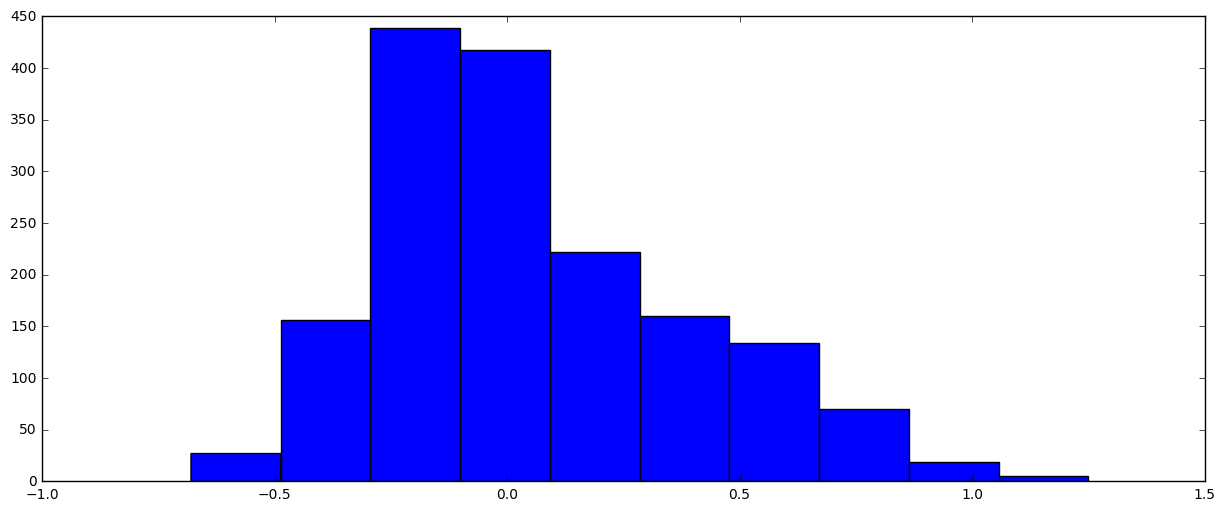

In [17]:
plt.hist(df.Value)

### 2. Analyse and convert the data types to the correct format to perform a time-series analysis.###

In [18]:
df.dtypes

Month     object
Value    float64
dtype: object

In [19]:
df.Month = df.Month.values.astype('datetime64[D]')

In [20]:
df.dtypes

Month    datetime64[ns]
Value           float64
dtype: object

### 3. Define the period to be used in the analysis. The rule defined by the project manager is:###

a) Compute the mean by year.

In [21]:
# Create the year column
df['Year'] = pd.DatetimeIndex(df.Month).year

In [22]:
# Group by year and calculate the mean
gr_by_year = df[['Year', 'Value']].groupby('Year').agg('mean')
gr_by_year.reset_index(inplace=True)
gr_by_year.columns = ['Year', 'Value']

In [23]:
gr_by_year.head(10)

,Year,Value
0,1880,-0.125833
1,1881,-0.075000
2,1882,-0.077500
3,1883,-0.152500
4,1884,-0.213333
5,1885,-0.222500
6,1886,-0.205833
7,1887,-0.255000
8,1888,-0.152500
9,1889,-0.104167


b) Look for the most recent year that has the mean negative.

In [24]:
# Sort, filter and select the first row
gr_by_year[gr_by_year.Value < 0].sort_values(by='Year', ascending=False)[0:1]

,Year,Value
96,1976,-0.076667


c) Your period of analysis should be from the next January after the last negative mean year until today.

In [38]:
df_filt = df[df.Month >= '1977-01-01']

d) How many months are included in your analysis?

In [39]:
len(df_filt)
# 486 = 12 x 40 years+6

486

e) Plot the data set of the period

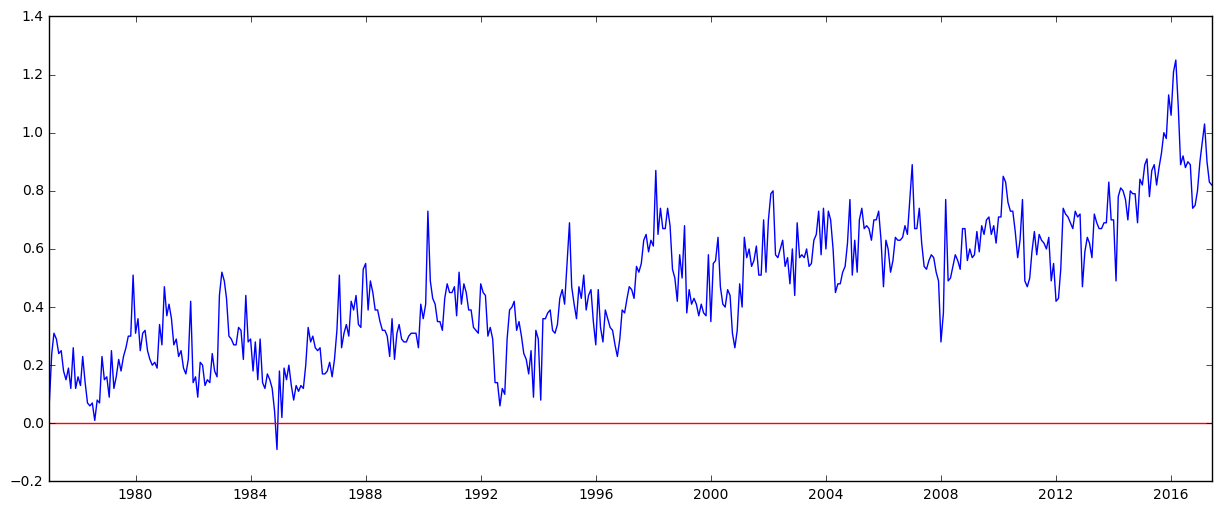

In [40]:
plt.plot(df_filt.Month, df_filt.Value)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

### 4. Is your series stationary? ###

In [41]:
# use the date as index for convenience
df_filt.set_index('Month', inplace=True)

In [42]:
# create a series for convenience
ts = df_filt['Value']

In [43]:
# Import the correct library to perform the analysis
from statsmodels.tsa.stattools import adfuller

In [44]:
# Calculate the rolling statistics
r_mean = ts.rolling(center = False, window = 12).mean()
r_std = ts.rolling(center = False, window = 12).std()

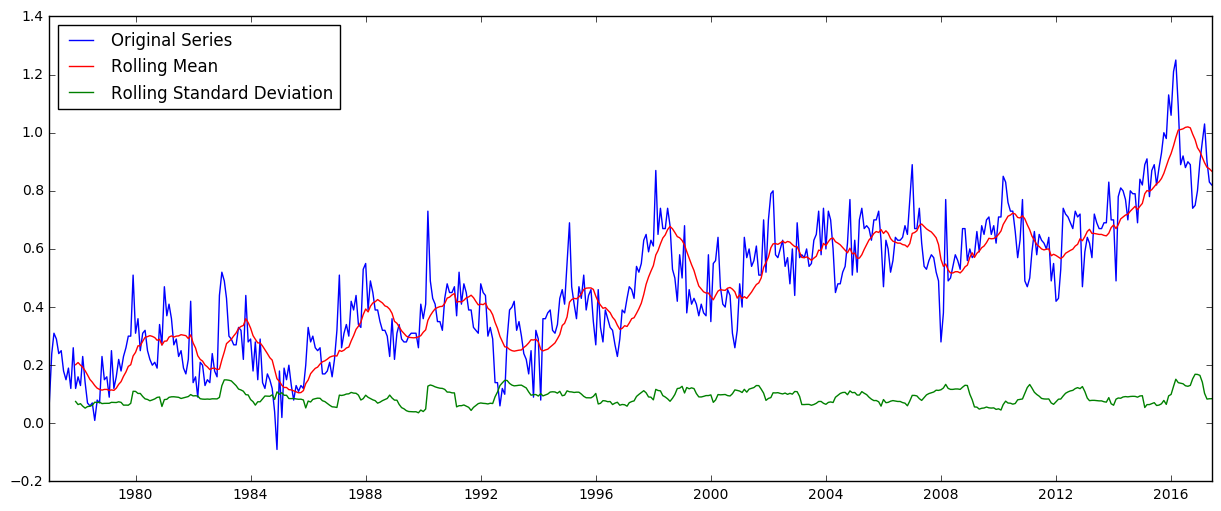

In [45]:
# Plot the rolling statistics
plt_ts = plt.plot(ts, color = 'blue',label = 'Original Series')
plt_mean = plt.plot(r_mean, color='red', label = 'Rolling Mean')
plt_std = plt.plot(r_std, color='green', label = 'Rolling Standard Deviation')
plt.legend(loc='upper left')
plt.show()

Plotting Rolling Statistics we can visually see the moving average or moving variance and see if it varies with time. It means that any month the data point will be replaced by the average/variance of the last 12 months.

In [46]:
# Run Dickey-Fuller test
test = adfuller(ts, autolag = 'AIC')

In [47]:
print ('Test Statistic: {}'.format(test[0]))
print ('p-value: {}'.format(test[1]))
print ('Lags Used: {}'.format(test[2]))
print ('# Observations Used: {}'.format(test[3]))
print ('Critical Value: {}'.format(test[4]))

Test Statistic: -1.6413429965511166
p-value: 0.46155912445068786
Lags Used: 9
# Observations Used: 476
Critical Value: {'1%': -3.4441628472391179, '10%': -2.5700143303792107, '5%': -2.8676311169658177}


This is one of the statistical tests for checking stationarity. The test results have the result of a Test Statistic and some Critical Values for difference confidence levels. If the Test Statistic is less than the Critical Value the series is stationary.

In [48]:
if test[0] < test[4]['1%']:
    print ('Stationary at 1% confidence level')
else:
    print ('Non-Stationary at 1% confidence level')

if test[0] < test[4]['5%']:
    print ('Stationary at 5% confidence level')
else:
    print ('Non-Stationary at 5% confidence level')

if test[0] < test[4]['10%']:
    print ('Stationary at 10% confidence level')
else:
    print ('Non-Stationary at 10% confidence level')

Non-Stationary at 1% confidence level
Non-Stationary at 5% confidence level
Non-Stationary at 10% confidence level


### 5. Decompose your series into three pieces: ###

a) Seasonality.

b) Trend.

c) Residuals components.

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

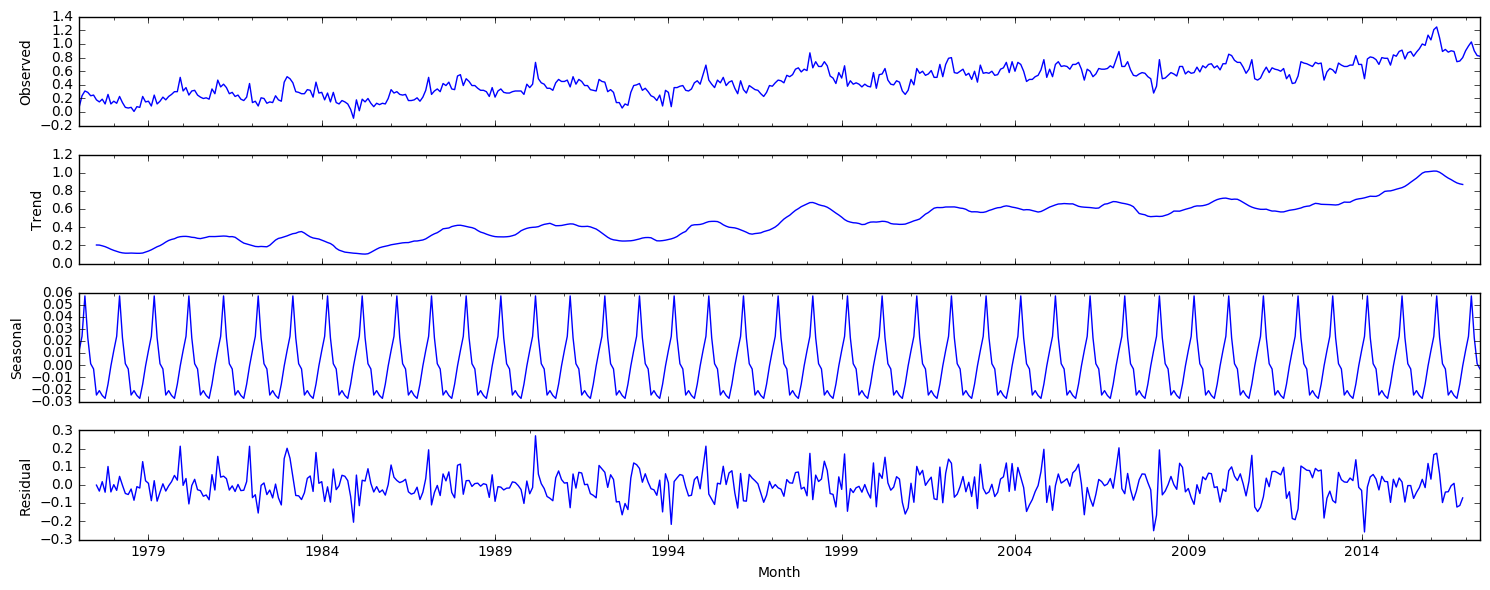

In [53]:
dec = seasonal_decompose(ts)
dec.plot()
plt.show()

# pip freeze
# pip install statsmodels==0.8.0rc1

### 6. Based on the findings and pieces of evidence extracted from the data you received, what is your conclusion about global warming? ###